## Starting notebook for reading emotibit data

In [1]:
import sys
sys.path.append('../')
from pyeyemo.gaze.eye import Emo
import pyeyemo.gaze.gaze_commons as gm
import pandas as pd
from pathlib import Path
from itertools import compress
import os
import numpy as np
from os import listdir
from os.path import isfile, join,isdir
import matplotlib.pyplot  as plt
import neurokit2 as nk



### Get the list of directories we want to analyse and copy paste the information in sessions.tx



In [2]:
## Get the list of directories we want to analyse and copy paste the information in sessions.tx
session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS")
data_path=Path(r"data")
subjects=[]
sessions=[]
window_analysis=5 # total window of analysis from first appearence of label
window_onset=0 # onset time discarded for analysis
annotation_list=['Asset','Surprise','Control'] # list of names that have assets

onlyfiles = [f for f in listdir(session_location) if isdir(join(session_location, f))]
for dir in onlyfiles:
 print (dir,flush=True)

ES0001_S003_PC_EM
ES0001_S004_PC_EM
ES0001_S005_PC_EM
ES0001_S006_PC_EM
ES0001_S008_PC_EM
ES0001_S009_PC_EM
ES0001_S010_PC_EM
ES0001_S011_PC_EM
ES0001_S012_PC_EM
ES0001_S013_PC_EM
ES0001_S015_PC_EM
ES0001_S017_PC_EM
ES0001_S018_PC_EM
ES0001_S019_PC_EM
ES0001_S020_PC_EM
ES0001_S022_PC_EM
ES0001_S023_PC_EM
ES0001_S024_PC_EM
ES0001_S025_PC_EM
ES0001_S026_PC_EM
ES0001_S027_PC_EM
ES0001_S028_PC_EM
ES0001_S029_PC_EM
ES0001_S030_PC_EM
ES0001_S031_PC_EM
Excluded
Resguardo_Excell


### Do the automatic analysis for emotibit data


In [3]:
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
session_loc_list=[session_location.joinpath(session,'00 Raw_data', 'emotibit') for session in sessions ]
# session_loc_list=[session_location.joinpath(session,'01 Processing_data') for session in sessions ]


In [4]:
session_loc_list

[WindowsPath('P:/Proyectos/2020/PY200016 - XSCAPE/Trabajo/00 XPERIMENTS/01 EXPERIMENTS_Santiago/00 COMPLETED/Exp_Stgo_0001/SESSIONS/ES0001_S003_PC_EM/00 Raw_data/emotibit')]

In [14]:
hr_concat=[]
for session, recording_location in zip(sessions,session_loc_list):
     data_paths=gm.extract_session_path_emotibit(recording_location=recording_location,
                                                 subject=session)
     
     # instantiate an emotibit object
     subject=Emo(session)
     subject.load_heart_rate(data_paths['BI'])
     subject.load_annotations(data_paths['annotations'])
     subject.annotations['LD']=subject.annotations['LD'].str.replace('.tiff','').str.replace('.tif','') #remove .tifs

     subject.labels_to_analyse(annotation_list)
     subject.filter_labels(subject.annotations['LD'])

     subject.label_data_annotation(annotation_time_col='LocalTimestamp',
                                   annotation_col='LD',
                                   label_name='asset',
                                   data_time_col_name='LocalTimestamp')


     subject.heart_rate['diff']=np.insert(np.diff(subject.heart_rate['HR']),0,0)
     
     signals_HR, info = nk.ppg_process(subject.heart_rate['HR'], sampling_rate=25)
     subject.heart_rate['ppg']=signals_HR['PPG_Rate']
     subject.heart_rate['PPG_Clean']=signals_HR['PPG_Clean']
     
     subject.data_z_scores(type='HR',
                           new_col='hr_z_score',
                           col='PPG_Clean')
     
     subject.calculate_hr(window_analysis=window_analysis,
                          window_onset=window_onset,x_col='PPG_Clean')
     
     subject.heart_rate['asset']=subject.heart_rate['asset'].str.replace('.tiff','').str.replace('.tif','') #remove .tifs
     subjects.append(subject)

     if len(np.unique(subject.annotations.loc[~subject.annotations['LD'].isna(),'LD']))\
          !=len(np.unique(subject.heart_rate.loc[~subject.heart_rate['asset'].isna(),'asset'])):
          print(session)
          print('bad')

hr_concat=pd.concat([subject.heart_rate_df for subject in subjects ])


KeyError: 'BI'

<AxesSubplot: xlabel='LocalTimestamp'>

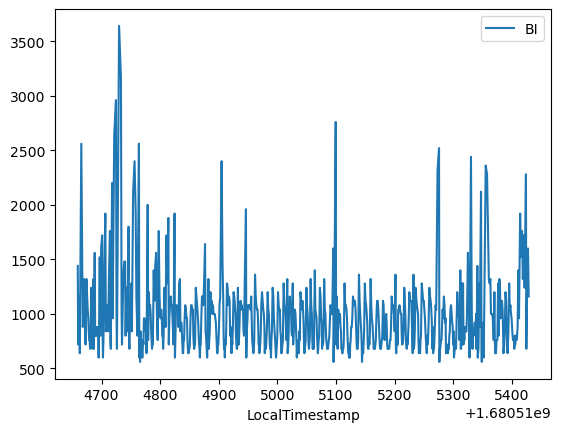

In [12]:
df=pd.read_csv(data_paths['heart_bea_inter_beat'])
df.plot(x='LocalTimestamp',y='BI')

In [13]:
df

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,BI
0,1.680515e+09,589497,29088,1,BI,1,100,1440
1,1.680515e+09,590217,29207,1,BI,1,100,720
2,1.680515e+09,591150,29357,1,BI,1,100,920
3,1.680515e+09,592310,29559,1,BI,1,100,1160
4,1.680515e+09,592963,29658,1,BI,1,100,640
...,...,...,...,...,...,...,...,...
798,1.680515e+09,1353661,24285,1,BI,1,100,2280
799,1.680515e+09,1354354,24405,1,BI,1,100,680
800,1.680515e+09,1355554,24588,1,BI,1,100,1200
801,1.680515e+09,1357167,24857,1,BI,1,100,1600


In [7]:
%matplotlib qt
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data= hr_concat)

<AxesSubplot: >

In [ ]:
a=subject.heart_rate

In [ ]:
hr_concat = hr_concat.reindex(sorted(hr_concat.columns), axis=1)
hr_concat

,Asset0001,Asset0002,Asset0003,Asset0004,Asset0005,Asset0006,Asset0007,Asset0008,Asset0009,Asset0010,...,Asset0050,Control01,Control02,Control03,Control04,Control05,Surprise01,Surprise02,Surprise03,Surprise04
ES0001_S003_PC_EM,81.781678,130.422741,40.881804,53.156166,44.692004,105.498044,45.605275,55.903422,63.486335,67.733951,...,119.566327,110.243341,63.750664,59.178663,54.614951,30.530614,101.206013,76.399815,48.606375,27.494291
ES0001_S004_PC_EM,20.623102,66.812625,42.857143,40.689733,23.791067,26.619815,25.300301,21.744242,43.968002,120.631749,...,42.515631,62.754265,13.859919,20.621170,25.835841,29.285216,15.252982,20.176951,130.707188,42.883968
ES0001_S005_PC_EM,41.993267,52.629419,22.310654,22.168282,48.080451,21.246331,25.716547,37.766929,44.971674,22.229330,...,21.424266,22.258947,40.884665,41.741943,21.147133,19.829446,44.653615,21.694175,22.371343,22.197628
ES0001_S006_PC_EM,25.613770,29.763862,55.555556,16.333134,34.048121,39.386203,35.204574,60.783132,82.069240,48.569972,...,51.058568,65.342752,55.555556,66.551312,57.413889,19.270213,55.555556,72.788096,59.980832,30.130454
ES0001_S008_PC_EM,46.828470,27.484510,28.190202,35.382970,46.538788,52.903445,21.736315,54.774133,31.748507,39.513095,...,30.702805,21.217315,26.841038,32.404520,42.381258,57.788328,26.229920,40.911673,36.543807,20.110900
ES0001_S009_PC_EM,14.573000,19.903362,23.949141,42.236253,41.952012,38.979931,34.078425,56.022294,74.117760,46.266523,...,26.923738,45.239056,21.854519,17.643597,53.737125,46.551932,15.562979,18.928118,106.586089,97.339282
ES0001_S010_PC_EM,48.281197,44.596998,31.051956,31.968834,115.396402,74.405106,108.456972,41.231925,28.518762,15.569220,...,42.157581,48.179706,75.147612,34.423260,38.477960,19.361691,19.030942,18.706540,47.323113,69.738308
ES0001_S011_PC_EM,22.299063,48.789322,39.951610,51.027532,41.212096,35.321476,79.606536,29.627045,61.066220,75.962808,...,60.896138,49.441090,37.573674,45.466543,26.407337,43.510141,94.696420,20.712145,43.402970,76.984739
ES0001_S013_PC_EM,42.351209,30.139479,92.885704,53.970900,101.266207,33.939151,37.808137,118.440369,61.386897,28.865842,...,50.622748,54.534151,53.418795,31.361723,55.952882,57.483538,29.174256,78.158715,51.408276,36.698783
ES0001_S017_PC_EM,95.251208,41.021608,36.313224,35.963795,79.039290,51.465224,41.377527,18.897872,51.266703,79.624167,...,41.722496,83.581971,50.562079,41.785651,110.818883,91.838988,98.094614,97.067453,98.397005,61.743886


In [9]:
subject.heart_rate["HR"]

0       60
1       59
2       61
3       63
4       66
        ..
1002    76
1003    74
1004    73
1005    68
1006    65
Name: HR, Length: 1007, dtype: int64

In [25]:
import neurokit2 as nk
ppg = subject.heart_rate["HR"]
signals_HR, info = nk.ppg_process(ppg, sampling_rate=20)
nk.ppg_plot(signals_HR)


c:\Users\arturoV\AppData\Local\miniconda3\envs\analysis\Lib\site-packages\neurokit2\ppg\ppg_plot.py:67: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


ValueError: The data length is too small to be segmented.

In [26]:
hrv_time = nk.hrv_time(signals_HR,sampling_rate=25, show=True)
hrv_time

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,727.619048,332.116711,NaN,NaN,NaN,NaN,NaN,NaN,496.426253,502.429221,...,350.0,0.669015,480.0,840.0,71.428571,88.095238,320.0,1680.0,5.25,164.0625


In [28]:
hrv_freq = nk.hrv_frequency(signals_HR, sampling_rate=100, show=True, normalize=True)
hrv_freq

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
signals_HR

,PPG_Raw,PPG_Clean,PPG_Rate,PPG_Peaks
0,60,0.081295,52.976791,0
1,59,-1.491808,52.976791,0
2,61,-1.065502,52.976791,0
3,63,1.355635,52.976791,0
4,66,2.203112,52.976791,0
...,...,...,...,...
1002,76,8.026863,36.585366,0
1003,74,5.454421,36.585366,0
1004,73,4.964444,36.585366,0
1005,68,2.965942,36.585366,0


In [ ]:
subject.heart_rate

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,HR,asset,hr_z_score,diff
0,1.682436e+09,395775,64494,1,HR,1,100,60,NaN,-4.569569,0
1,1.682436e+09,396908,64682,1,HR,1,100,59,NaN,-4.938432,-1
2,1.682436e+09,397668,64799,1,HR,1,100,61,NaN,-4.200707,2
3,1.682436e+09,398441,64935,1,HR,1,100,63,NaN,-3.462983,2
4,1.682436e+09,399121,65037,1,HR,1,100,66,NaN,-2.356396,3
...,...,...,...,...,...,...,...,...,...,...,...
1002,1.682437e+09,1244797,8278,1,HR,1,100,76,Asset0008,1.332226,-6
1003,1.682437e+09,1245836,8446,1,HR,1,100,74,Asset0008,0.594502,-2
1004,1.682437e+09,1246690,8590,1,HR,1,100,73,Asset0008,0.225640,-1
1005,1.682437e+09,1248876,8941,1,HR,1,100,68,Asset0008,-1.618672,-5


In [ ]:
%matplotlib qt
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=hr_concat)

<AxesSubplot: >

In [ ]:
%matplotlib qt
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.plot()

AttributeError: module 'seaborn' has no attribute 'plot'

In [ ]:
subject.annotation_list

2       Asset0035
5       Control01
8       Asset0047
11      Asset0004
14      Asset0029
17      Asset0015
20      Asset0042
23      Asset0012
26      Asset0032
29     Surprise04
32      Asset0022
35      Asset0008
38      Asset0006
41      Control02
44      Asset0018
47      Asset0010
50      Asset0024
53      Asset0011
56      Asset0049
59      Asset0020
62     Surprise01
65      Asset0037
68      Asset0027
71      Asset0031
74      Asset0034
77      Asset0036
80      Asset0007
83      Asset0041
86      Asset0048
89     Surprise02
92      Asset0028
95      Asset0030
98      Asset0044
101     Asset0039
104     Control04
107     Asset0046
110     Asset0045
113     Asset0050
116     Asset0001
119     Asset0043
122     Asset0033
125    Surprise03
128     Asset0017
131     Asset0040
134     Asset0003
137     Asset0002
140     Asset0014
143     Asset0016
146     Asset0009
149     Control03
152     Asset0005
155     Asset0026
158     Asset0021
161     Control05
163     Asset0008
Name: LD, 

In [ ]:
np.unique(subject.heart_rate.loc[~subject.heart_rate['asset'].isna(),'asset'])

array(['Asset0001', 'Asset0002', 'Asset0003', 'Asset0004', 'Asset0005',
       'Asset0006', 'Asset0007', 'Asset0008', 'Asset0009', 'Asset0010',
       'Asset0011', 'Asset0012', 'Asset0014', 'Asset0015', 'Asset0016',
       'Asset0017', 'Asset0018', 'Asset0020', 'Asset0021', 'Asset0022',
       'Asset0024', 'Asset0026', 'Asset0027', 'Asset0028', 'Asset0029',
       'Asset0030', 'Asset0031', 'Asset0032', 'Asset0033', 'Asset0034',
       'Asset0035', 'Asset0036', 'Asset0037', 'Asset0039', 'Asset0040',
       'Asset0041', 'Asset0042', 'Asset0043', 'Asset0044', 'Asset0045',
       'Asset0046', 'Asset0047', 'Asset0048', 'Asset0049', 'Asset0050',
       'Control01', 'Control02', 'Control03', 'Control04', 'Control05',
       'EndOfExperiment', 'Surprise01', 'Surprise02', 'Surprise03',
       'Surprise04', 'blank_0', 'blank_1', 'blank_10', 'blank_11',
       'blank_12', 'blank_13', 'blank_14', 'blank_15', 'blank_16',
       'blank_17', 'blank_18', 'blank_19', 'blank_2', 'blank_20',
       'blan

In [ ]:
subject.heart_rate.plot(x='EmotiBitTimestamp',y='HR')
subject.heart_rate.plot(x='EmotiBitTimestamp',y='DataReliability')

<AxesSubplot: xlabel='EmotiBitTimestamp'>

In [ ]:
a=subject.annotations['LD']
any(a.str.contains('Asset0031'))
[i for i, x in enumerate(a.str.contains('Asset0031')) if x]

[71]

In [ ]:
a=subject.annotations
len(np.unique(a['LD']))


163

In [ ]:
a['LD']

0              blank_0
1        drift_point_0
2            Asset0035
3              blank_1
4        drift_point_1
            ...       
159           blank_53
160     drift_point_53
161          Control05
162    EndOfExperiment
163          Asset0008
Name: LD, Length: 164, dtype: object

In [ ]:
hr=subject.heart_rate
hr
g=np.unique(hr.loc[~hr['asset'].isna(),'asset'])
len(g)

163

In [ ]:
hr.loc[~hr['asset'].isna(),:]

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,HR,asset,hr_z_score
311,1.682436e+09,663588,43152,1,HR,1,100,72,blank_0,-0.143223
312,1.682436e+09,664441,43290,1,HR,1,100,72,drift_point_0,-0.143223
313,1.682436e+09,665281,43426,1,HR,1,100,72,drift_point_0,-0.143223
314,1.682436e+09,666174,43576,1,HR,1,100,72,drift_point_0,-0.143223
315,1.682436e+09,667107,43730,1,HR,1,100,71,Asset0035,-0.512085
...,...,...,...,...,...,...,...,...,...,...
1002,1.682437e+09,1244797,8278,1,HR,1,100,76,Asset0008,1.332226
1003,1.682437e+09,1245836,8446,1,HR,1,100,74,Asset0008,0.594502
1004,1.682437e+09,1246690,8590,1,HR,1,100,73,Asset0008,0.225640
1005,1.682437e+09,1248876,8941,1,HR,1,100,68,Asset0008,-1.618672


In [ ]:
subject['asset']

TypeError: 'Emo' object is not subscriptable

In [ ]:
import pyxdf
data,header=pyxdf.load_xdf(recording_location)


PermissionError: [Errno 13] Permission denied: 'P:\\Proyectos\\2020\\PY200016 - XSCAPE\\Trabajo\\00 XPERIMENTS\\01 EXPERIMENTS_Santiago\\00 COMPLETED\\Exp_Stgo_0001\\SESSIONS\\ES0001_S005_PC_EM\\00 Raw_data\\emotibit'

In [ ]:
data[1]

{'info': defaultdict(list,
             {'name': ['pupil_capture'],
              'type': ['Gaze'],
              'channel_count': ['22'],
              'nominal_srate': ['0'],
              'channel_format': ['double64'],
              'source_id': ['0beb6d28-676c-44f8-8258-c7da93c94a71'],
              'version': ['1.1000000000000001'],
              'created_at': ['193.9634442'],
              'uid': ['6402f7e8-fea5-4363-a0b0-5b612ed067c5'],
              'session_id': ['default'],
              'hostname': ['DESKTOP-3LBQOEJ'],
              'v4address': [None],
              'v4data_port': ['16573'],
              'v4service_port': ['16573'],
              'v6address': [None],
              'v6data_port': ['16573'],
              'v6service_port': ['16573'],
              'desc': [defaultdict(list,
                           {'pupil_lsl_relay_version': ['2.3'],
                            'channels': [defaultdict(list,
                                         {'channel': [defaultdi

In [ ]:
data_sync=data[3]
gaze=data[1]
fixations=data[2]

In [ ]:
data[2]['info']

defaultdict(list,
            {'name': ['pupil_capture_fixations'],
             'type': ['Fixations'],
             'channel_count': ['7'],
             'nominal_srate': ['0'],
             'channel_format': ['double64'],
             'source_id': ['84c04d92-3c63-41ef-ac60-08a23c329d22'],
             'version': ['1.1000000000000001'],
             'created_at': ['9881.3533692000001'],
             'uid': ['73b5e8c2-de44-4d9d-b96d-41a68e4e8d64'],
             'session_id': ['default'],
             'hostname': ['DESKTOP-3LBQOEJ'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16575'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16575'],
             'desc': [defaultdict(list,
                          {'pupil_lsl_relay_version': ['2.3'],
                           'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,


In [ ]:
data_sync['footer']

{'info': defaultdict(list,
             {'first_timestamp': ['2493.0204354'],
              'last_timestamp': ['3203.3081389'],
              'sample_count': ['164'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['2460.44235175'],
                                          'value': ['-1.175000011244265e-05']}),
                             defaultdict(list,
                                         {'time': ['2465.4548861'],
                                          'value': ['-1.660000020820007e-05']}),
                             defaultdict(list,
                                         {'time': ['2470.46650965'],
                                          'value': ['-1.485000007050985e-05']}),
                             defaultdict(list,
                                         {'time': ['2475.466980499999'],
                                          'value': ['-1.5299999

In [ ]:
a=gaze['time_series']
a

array([[ 1.00000000e+00,  3.34607324e-01,  7.34717941e-01, ...,
         2.92226083e+01,  3.22630099e+00,  3.02459137e+00],
       [ 1.00000000e+00,  3.36215559e-01,  7.36924271e-01, ...,
         2.92226083e+01,  3.21135720e+00,  3.02459137e+00],
       [ 1.00000000e+00,  3.36233116e-01,  7.36243773e-01, ...,
         2.90989313e+01,  3.21135720e+00,  3.01172699e+00],
       ...,
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan],
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan],
       [ 0.00000000e+00,  6.95890053e-01, -3.34831377e-01, ...,
                    nan,  3.95481640e-03,             nan]])

In [ ]:
b=gaze['time_stamps']
len(b)

185894

In [ ]:
s=fixations['footer']
s

{'info': defaultdict(list,
             {'first_timestamp': ['0'],
              'last_timestamp': ['0'],
              'sample_count': ['0'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['11206.18266655'],
                                          'value': ['-4.849999641010072e-06']}),
                             defaultdict(list,
                                         {'time': ['11211.183215'],
                                          'value': ['-1.759999940986745e-05']}),
                             defaultdict(list,
                                         {'time': ['11216.19787335'],
                                          'value': ['-1.454999983252492e-05']}),
                             defaultdict(list,
                                         {'time': ['11221.20030425'],
                                          'value': ['-9.150000551017001e-06']}),
       

In [ ]:
data_sync['time_stamps']

array([11754.33466454, 11756.32184454, 11758.32239574, 11764.34099274,
       11766.33856824, 11768.33872204, 11774.35554915, 11776.35563135,
       11778.35528185, 11784.37456285, 11786.37191295, 11788.37194085,
       11794.39194666, 11796.38904666, 11798.38881716, 11804.40639416,
       11806.40576046, 11808.40572857, 11814.42259297, 11816.42199357,
       11818.42197807, 11824.43751247, 11826.42224368, 11828.42245678,
       11834.44484008, 11836.43927278, 11838.43874848, 11844.45602239,
       11846.45559219, 11848.45556799, 11854.47262589, 11856.47216889,
       11858.47232999, 11864.4906273 , 11866.4889219 , 11868.4890463 ,
       11874.5070064 , 11876.5055184 , 11878.5055461 , 11884.52515881,
       11886.52324911, 11888.52257711, 11894.53878471, 11896.54032511,
       11898.53892361, 11904.56059962, 11906.55606192, 11908.55558732,
       11914.57549162, 11916.57233622, 11918.57238023, 11924.59170533,
       11926.58897853, 11928.58908993, 11934.60595983, 11936.60584994,
      

In [ ]:
for keys, values in data_sync.items():
    print(keys)


info
footer
time_series
time_stamps


In [ ]:
data_sync['footer']

{'info': defaultdict(list,
             {'first_timestamp': ['11754.3346734'],
              'last_timestamp': ['12329.9632187'],
              'sample_count': ['163'],
              'clock_offsets': [defaultdict(list,
                           {'offset': [defaultdict(list,
                                         {'time': ['11206.1827183'],
                                          'value': ['-6.299999768089037e-06']}),
                             defaultdict(list,
                                         {'time': ['11211.183191'],
                                          'value': ['-7.999999979801942e-06']}),
                             defaultdict(list,
                                         {'time': ['11216.19787465'],
                                          'value': ['-1.115000031859381e-05']}),
                             defaultdict(list,
                                         {'time': ['11221.200296'],
                                          'value': ['-9.200000931

In [ ]:
def lsl_to_df(da:dict):
    pass